In [151]:
import pandas as pd

In [152]:
import numpy as np

In [153]:
dataset = pd.read_csv('dfdata.csv')

In [154]:
dataset

,Pemilik Rumah,Status Perkawinan,Pendapatan Tahunan,Penunggak Hutang
0,Ya,Lajang,125,Bukan
1,Bukan,Menikah,100,Bukan
2,Bukan,Lajang,70,Bukan
3,Ya,Menikah,120,Bukan
4,Bukan,Bercerai,95,Ya
5,Bukan,Menikah,60,Bukan
6,Ya,Bercerai,220,Bukan
7,Bukan,Lajang,85,Ya
8,Bukan,Menikah,75,Bukan
9,Bukan,Lajang,90,Ya


In [155]:
x = dataset.iloc[:,:-1]

In [156]:
x

,Pemilik Rumah,Status Perkawinan,Pendapatan Tahunan
0,Ya,Lajang,125
1,Bukan,Menikah,100
2,Bukan,Lajang,70
3,Ya,Menikah,120
4,Bukan,Bercerai,95
5,Bukan,Menikah,60
6,Ya,Bercerai,220
7,Bukan,Lajang,85
8,Bukan,Menikah,75
9,Bukan,Lajang,90


In [157]:
y = dataset.iloc[:,2]

In [158]:
y

0     125
1     100
2      70
3     120
4      95
5      60
6     220
7      85
8      75
9      90
10     88
11     76
12    124
Name: Pendapatan Tahunan, dtype: int64

In [159]:
from sklearn.preprocessing import LabelEncoder

In [160]:
labelencoder_x = LabelEncoder()

In [161]:
x = x.apply(LabelEncoder().fit_transform)

In [162]:
x

,Pemilik Rumah,Status Perkawinan,Pendapatan Tahunan
0,1,1,11
1,0,2,8
2,0,1,1
3,1,2,9
4,0,0,7
5,0,2,0
6,1,0,12
7,0,1,4
8,0,2,2
9,0,1,6


In [163]:
from sklearn.tree import DecisionTreeClassifier

In [164]:
regressor=DecisionTreeClassifier()

In [165]:
regressor.fit(x.iloc[:,1:5],y)

DecisionTreeClassifier()

In [166]:
x_in = np.array([2,2])

In [167]:
y_pred = regressor.predict([x_in])

In [168]:
y_pred

array([75], dtype=int64)

In [169]:
from six import StringIO

In [170]:
from IPython.display import Image

In [171]:
from sklearn.tree import export_graphviz

In [172]:
import pydotplus

In [173]:
dot_data = StringIO()

In [174]:
dataset.head()

,Pemilik Rumah,Status Perkawinan,Pendapatan Tahunan,Penunggak Hutang
0,Ya,Lajang,125,Bukan
1,Bukan,Menikah,100,Bukan
2,Bukan,Lajang,70,Bukan
3,Ya,Menikah,120,Bukan
4,Bukan,Bercerai,95,Ya


In [175]:
dataset.shape

(13, 4)

In [176]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pemilik Rumah       13 non-null     object
 1   Status Perkawinan   13 non-null     object
 2   Pendapatan Tahunan  13 non-null     int64 
 3   Penunggak Hutang    13 non-null     object
dtypes: int64(1), object(3)
memory usage: 544.0+ bytes


In [177]:
d={'Ya':1,'Bukan':0}
dataset['Pemilik Rumah']=dataset['Pemilik Rumah'].map(d) 
dataset['Penunggak Hutang']=dataset['Penunggak Hutang'].map(d)
d1={'Lajang':0,'Menikah':1,'Bercerai':2}
dataset['Status Perkawinan']=dataset['Status Perkawinan'].map(d1)
dataset.head()

,Pemilik Rumah,Status Perkawinan,Pendapatan Tahunan,Penunggak Hutang
0,1,0,125,0
1,0,1,100,0
2,0,0,70,0
3,1,1,120,0
4,0,2,95,1


In [178]:
dataset.columns

Index(['Pemilik Rumah', 'Status Perkawinan', 'Pendapatan Tahunan',
       'Penunggak Hutang'],
      dtype='object')

In [179]:
x=dataset[['Pemilik Rumah', 'Status Perkawinan', 'Pendapatan Tahunan']]
y=dataset['Penunggak Hutang']
features=list(dataset.columns[:3])
print(features)

['Pemilik Rumah', 'Status Perkawinan', 'Pendapatan Tahunan']


In [180]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model=model.fit(x,y)

In [181]:
tree.export_graphviz(model,out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [182]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

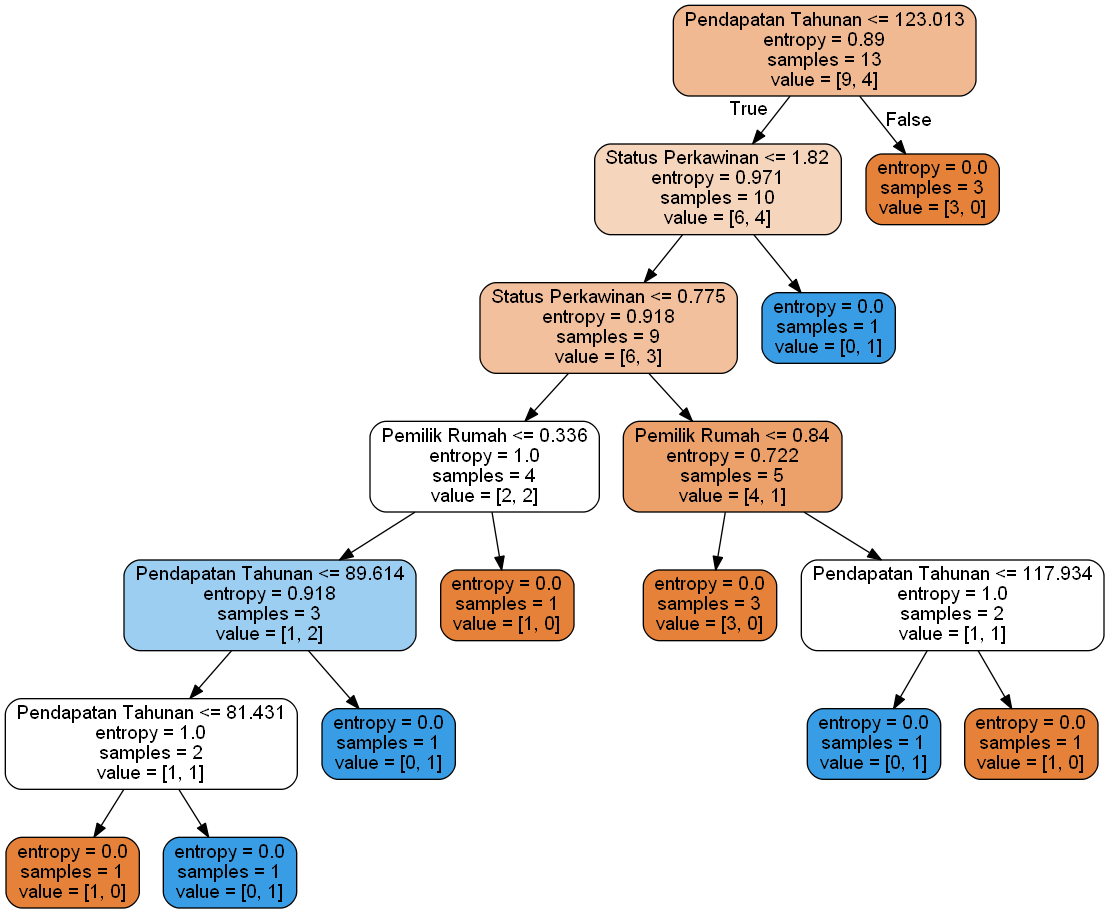

In [183]:
Image(graph.create_png())

In [184]:
graph.write_png("tree.png")

True

In [185]:
from sklearn.tree import export_text

r = export_text(model, feature_names=features)
print(r)

|--- Pendapatan Tahunan <= 123.01
|   |--- Status Perkawinan <= 1.82
|   |   |--- Status Perkawinan <= 0.78
|   |   |   |--- Pemilik Rumah <= 0.34
|   |   |   |   |--- Pendapatan Tahunan <= 89.61
|   |   |   |   |   |--- Pendapatan Tahunan <= 81.43
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Pendapatan Tahunan >  81.43
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pendapatan Tahunan >  89.61
|   |   |   |   |   |--- class: 1
|   |   |   |--- Pemilik Rumah >  0.34
|   |   |   |   |--- class: 0
|   |   |--- Status Perkawinan >  0.78
|   |   |   |--- Pemilik Rumah <= 0.84
|   |   |   |   |--- class: 0
|   |   |   |--- Pemilik Rumah >  0.84
|   |   |   |   |--- Pendapatan Tahunan <= 117.93
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Pendapatan Tahunan >  117.93
|   |   |   |   |   |--- class: 0
|   |--- Status Perkawinan >  1.82
|   |   |--- class: 1
|--- Pendapatan Tahunan >  123.01
|   |--- class: 0

